In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

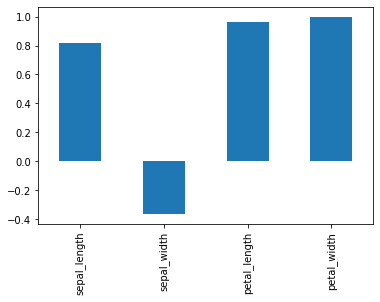

In [9]:
df.corr()['petal_width'].plot(kind='bar')

In [13]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
X = df.drop('species',axis=1)

In [12]:
y = df['species']

In [16]:
#Hot encoding y
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [20]:
X_train.shape

(105, 4)

In [26]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/300
4/4 [==============================] - 1s 41ms/step - loss: 1.0383 - accuracy: 0.3947 - val_loss: 1.0344 - val_accuracy: 0.3333
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0449 - accuracy: 0.3364 - val_loss: 1.0311 - val_accuracy: 0.3556
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0205 - accuracy: 0.4003 - val_loss: 1.0279 - val_accuracy: 0.3333
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0269 - accuracy: 0.3562 - val_loss: 1.0246 - val_accuracy: 0.3333
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0125 - accuracy: 0.3739 - val_loss: 1.0215 - val_accuracy: 0.3333
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0131 - accuracy: 0.3933 - val_loss: 1.0185 - val_accuracy: 0.3333
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0112 - accuracy: 0.3715 - val_loss: 1.0154 - val_accuracy: 0.3333
Epoch 8/300
4/4 [=========

4/4 [==============================] - 0s 5ms/step - loss: 0.5741 - accuracy: 0.7211 - val_loss: 0.6927 - val_accuracy: 0.5556
Epoch 118/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5503 - accuracy: 0.7440 - val_loss: 0.6906 - val_accuracy: 0.5556
Epoch 119/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5867 - accuracy: 0.6930 - val_loss: 0.6879 - val_accuracy: 0.5556
Epoch 120/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5679 - accuracy: 0.7159 - val_loss: 0.6857 - val_accuracy: 0.5556
Epoch 121/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5520 - accuracy: 0.7336 - val_loss: 0.6839 - val_accuracy: 0.5556
Epoch 122/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5719 - accuracy: 0.7013 - val_loss: 0.6819 - val_accuracy: 0.5556
Epoch 123/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5687 - accuracy: 0.7065 - val_loss: 0.6799 - val_accuracy: 0.5556
Epoch 124/300
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.3826 - accuracy: 0.9088 - val_loss: 0.4747 - val_accuracy: 0.8444
Epoch 234/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3904 - accuracy: 0.8869 - val_loss: 0.4734 - val_accuracy: 0.8444
Epoch 235/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.9057 - val_loss: 0.4724 - val_accuracy: 0.8444
Epoch 236/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3738 - accuracy: 0.9161 - val_loss: 0.4716 - val_accuracy: 0.8444
Epoch 237/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3730 - accuracy: 0.9119 - val_loss: 0.4711 - val_accuracy: 0.8222
Epoch 238/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3810 - accuracy: 0.9129 - val_loss: 0.4701 - val_accuracy: 0.8222
Epoch 239/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3755 - accuracy: 0.9182 - val_loss: 0.4695 - val_accuracy: 0.8222
Epoch 240/300
4/4 [========

In [31]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

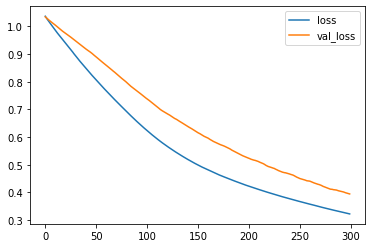

In [32]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

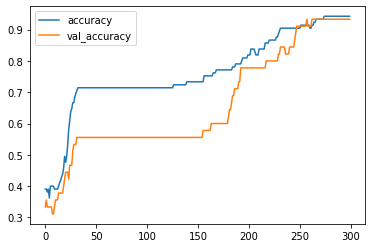

In [33]:
metrics[['accuracy','val_accuracy']].plot()

In [34]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.39472708106040955, 0.9333333373069763]

# Ready Model for Deployment¶

In [36]:
epochs = len(metrics)
epochs

300

In [37]:
scaled_X = scaler.fit_transform(X)

In [38]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 1ms/step - loss: 1.3031 - accuracy: 0.3964
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 1.2634 - accuracy: 0.3930
Epoch 3/300
5/5 [==============================] - 0s 949us/step - loss: 1.2298 - accuracy: 0.4479
Epoch 4/300
5/5 [==============================] - 0s 976us/step - loss: 1.1943 - accuracy: 0.4585
Epoch 5/300
5/5 [==============================] - 0s 734us/step - loss: 1.1512 - accuracy: 0.5394
Epoch 6/300
5/5 [==============================] - 0s 752us/step - loss: 1.2370 - accuracy: 0.4762
Epoch 7/300
5/5 [==============================] - 0s 716us/step - loss: 1.1662 - accuracy: 0.5680
Epoch 8/300
5/5 [==============================] - 0s 787us/step - loss: 1.1588 - accuracy: 0.5577
Epoch 9/300
5/5 [==============================] - 0s 837us/step - loss: 1.1967 - accuracy: 0.5418
Epoch 10/300
5/5 [==============================] - 0s 873us/step - loss: 1.1383 - accuracy: 0.6001
Epoch 11/300


5/5 [==============================] - 0s 779us/step - loss: 0.5357 - accuracy: 0.8921
Epoch 165/300
5/5 [==============================] - 0s 688us/step - loss: 0.5307 - accuracy: 0.9334
Epoch 166/300
5/5 [==============================] - 0s 758us/step - loss: 0.5609 - accuracy: 0.8995
Epoch 167/300
5/5 [==============================] - 0s 703us/step - loss: 0.5328 - accuracy: 0.9247
Epoch 168/300
5/5 [==============================] - 0s 999us/step - loss: 0.5452 - accuracy: 0.9125
Epoch 169/300
5/5 [==============================] - 0s 809us/step - loss: 0.5338 - accuracy: 0.9177
Epoch 170/300
5/5 [==============================] - 0s 757us/step - loss: 0.5266 - accuracy: 0.9186
Epoch 171/300
5/5 [==============================] - 0s 694us/step - loss: 0.5418 - accuracy: 0.9021
Epoch 172/300
5/5 [==============================] - 0s 723us/step - loss: 0.5424 - accuracy: 0.9139
Epoch 173/300
5/5 [==============================] - 0s 753us/step - loss: 0.5130 - accuracy: 0.9356
Epoc

In [40]:
model.save("final_iris_model.h5")

# Saving Scaler

In [42]:
import joblib
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

# Predicting a Single New Flower

In [44]:
from tensorflow.keras.models import load_model
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [46]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [47]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [48]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [ ]:
def return_prediction(model,scaler,sample_json)